# Packages

In [1]:
from folders import *
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

plt.style.use("seaborn")

# Directory

In [2]:
path = r"C:\Users\jigon\OneDrive\Documentos\Economía\Commuting-Zones-Costa-Rica"
os.chdir(path)

# Read the data

In [3]:
employment2011 = pd.read_excel(employment2011_file)
enaho2020 = pd.read_spss(enaho2020_file)
enaho2021 = pd.read_spss(enaho2021_file)
region_concordance = pd.read_excel(region_concordance_file, sheet_name="equivalencias region")
region_concordance_names = region_concordance.set_index("enaho_2020").to_dict()["base"]
distances = pd.read_excel(costa_rican_municipalities_distance_matrix)
agg_distances = pd.read_excel(costa_rican_aggregate_distance_matrix)

# Share of employed population doing work from home in 2020

In [4]:
wfh2020 = enaho2020.groupby(["CondAct", "C11"])["FACTOR"].sum().reset_index().query("CondAct == 'Ocupado'")
wfh2020["FACTOR"] /= wfh2020["FACTOR"].sum() / 100
wfh2020.query("C11 == 'Dentro de su casa'").round(2)

,CondAct,C11,FACTOR
27,Ocupado,Dentro de su casa,14.25


# Share of employed population doing work from home in 2021

In [5]:
wfh2021 = enaho2021.groupby(["CondAct", "M4"])["FACTOR"].sum().reset_index().query("CondAct == 'Ocupado'")
wfh2021["FACTOR"] /= wfh2021["FACTOR"].sum() / 100
wfh2021.query("M4 == 'Sí'").round(2)

,CondAct,M4,FACTOR
5,Ocupado,Sí,14.27


# Share of employed population that started doing work from home because of COVID-19 in 2021

In [6]:
wfh2021_covid = enaho2021.groupby(["CondAct", "M4", "M5"])["FACTOR"].sum().reset_index().query("CondAct == 'Ocupado' and M4 == 'Sí'")
wfh2021_covid["FACTOR"] /= wfh2021_covid["FACTOR"].sum() / 100
wfh2021_covid.query("M5 == 'Sí'").round(2)

,CondAct,M4,M5,FACTOR
11,Ocupado,Sí,Sí,83.58


# How many days do people work from home given when they started doing it?

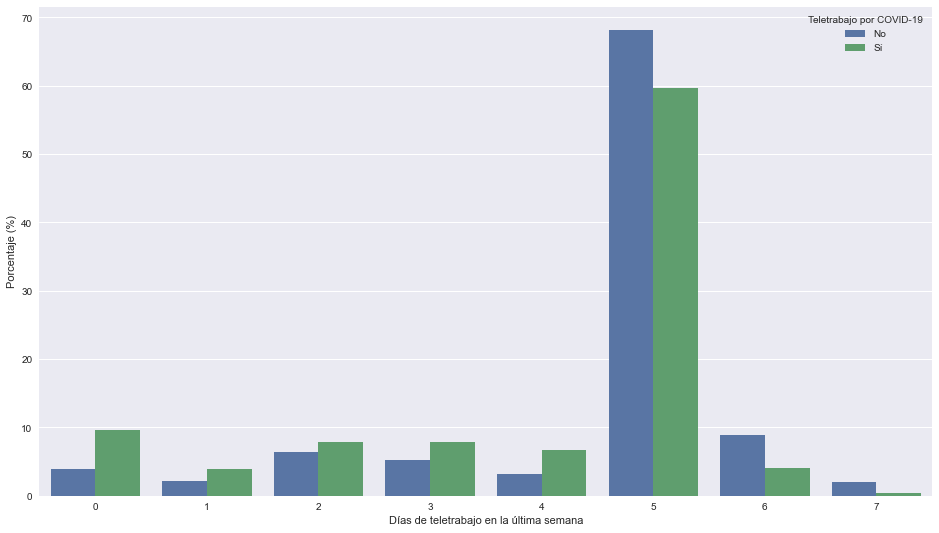

In [7]:
wfh2021_days = enaho2021.groupby(["CondAct", "M4", "M5", "M6"])["FACTOR"].sum().reset_index().query("CondAct == 'Ocupado' and M4 == 'Sí' and M6 not in (8.0, 'Ignorado')")
wfh2021_days["M6"] = wfh2021_days["M6"].cat.codes.round(0)
wfh2021_days["FACTOR"] /= wfh2021_days.groupby(["M5"])["FACTOR"].transform("sum") / 100
wfh2021_days["FACTOR"] = wfh2021_days["FACTOR"].round(2)
wfh2021_days = wfh2021_days.drop(columns=["CondAct", "M4"])
wfh2021_days.rename(columns={"FACTOR": "Porcentaje (%)", "M5": "Teletrabajo por COVID-19", "M6": "Días de teletrabajo en la última semana"}, inplace=True)
fig, ax = plt.subplots(figsize=(16, 9))
sns.barplot(x="Días de teletrabajo en la última semana", y="Porcentaje (%)", hue="Teletrabajo por COVID-19", data=wfh2021_days, ax=ax)
plt.savefig(os.path.join(FIGURES_MAIN_TEXT_OUTPUT, "share_wfh_by_covid.png"))

# Share of employed population doing work from home given their region of residence

In [8]:
wfh2020_region = enaho2020.groupby(["REGION", "CondAct", "C11"])["FACTOR"].sum().reset_index().query("CondAct == 'Ocupado'")
wfh2020_region["FACTOR"] /= wfh2020_region.groupby(["REGION"])["FACTOR"].transform("sum") / 100
wfh2020_region = wfh2020_region.query("C11 == 'Dentro de su casa'").round(2)[["REGION", "FACTOR"]].copy()
wfh2020_region["Año"] = 2020
wfh2020_region.rename(columns={"REGION": "Región de Planificación", "FACTOR": "Porcentaje (%)"}, inplace=True)

In [9]:
wfh2021_region = enaho2021.groupby(["REGION", "CondAct", "M4"])["FACTOR"].sum().reset_index().query("CondAct == 'Ocupado'")
wfh2021_region["FACTOR"] /= wfh2021_region.groupby(["REGION"])["FACTOR"].transform("sum") / 100
wfh2021_region = wfh2021_region.query("M4 == 'Sí'").round(2)[["REGION", "FACTOR"]].copy()
wfh2021_region["Año"] = 2021
wfh2021_region.rename(columns={"REGION": "Región de Planificación", "FACTOR": "Porcentaje (%)"}, inplace=True)

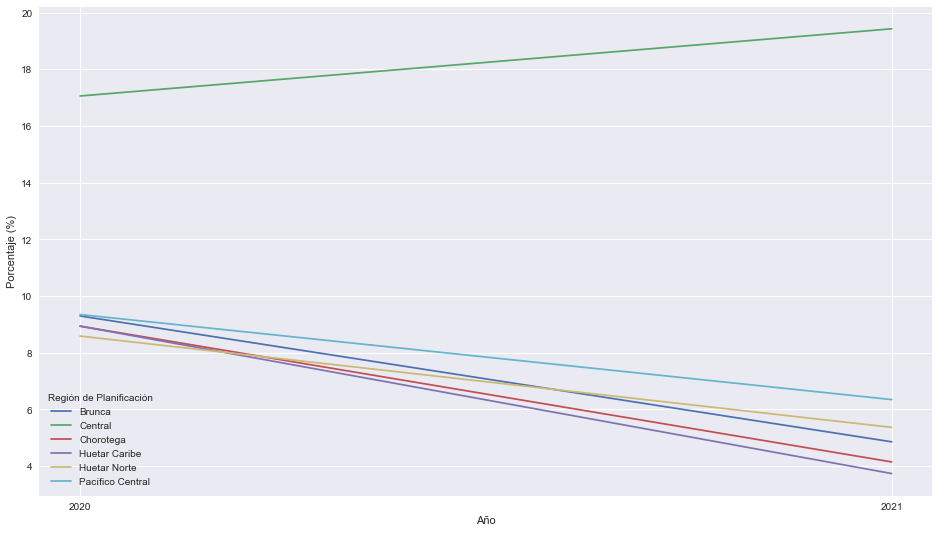

In [10]:
wfh_region = pd.concat([wfh2020_region, wfh2021_region], ignore_index=True)
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x="Año", y="Porcentaje (%)", hue="Región de Planificación", data=wfh_region, ax=ax)
ax.set_xticks([2020, 2021])
plt.savefig(os.path.join(FIGURES_MAIN_TEXT_OUTPUT, "wfh_region.png"))

# Share of employed population doing work from home given their gender

In [11]:
wfh2020_gender = enaho2020.groupby(["A4", "CondAct", "C11"])["FACTOR"].sum().reset_index().query("CondAct == 'Ocupado'")
wfh2020_gender["FACTOR"] /= wfh2020_gender.groupby(["A4"])["FACTOR"].transform("sum") / 100
wfh2020_gender = wfh2020_gender.query("C11 == 'Dentro de su casa'").round(2)[["A4", "FACTOR"]].copy()
wfh2020_gender["Año"] = 2020
wfh2020_gender.rename(columns={"A4": "Género", "FACTOR": "Porcentaje (%)"}, inplace=True)

In [12]:
wfh2021_gender = enaho2021.groupby(["A4", "CondAct", "M4"])["FACTOR"].sum().reset_index().query("CondAct == 'Ocupado'")
wfh2021_gender["FACTOR"] /= wfh2021_gender.groupby(["A4"])["FACTOR"].transform("sum") / 100
wfh2021_gender = wfh2021_gender.query("M4 == 'Sí'").round(2)[["A4", "FACTOR"]].copy()
wfh2021_gender["Año"] = 2021
wfh2021_gender.rename(columns={"A4": "Género", "FACTOR": "Porcentaje (%)"}, inplace=True)

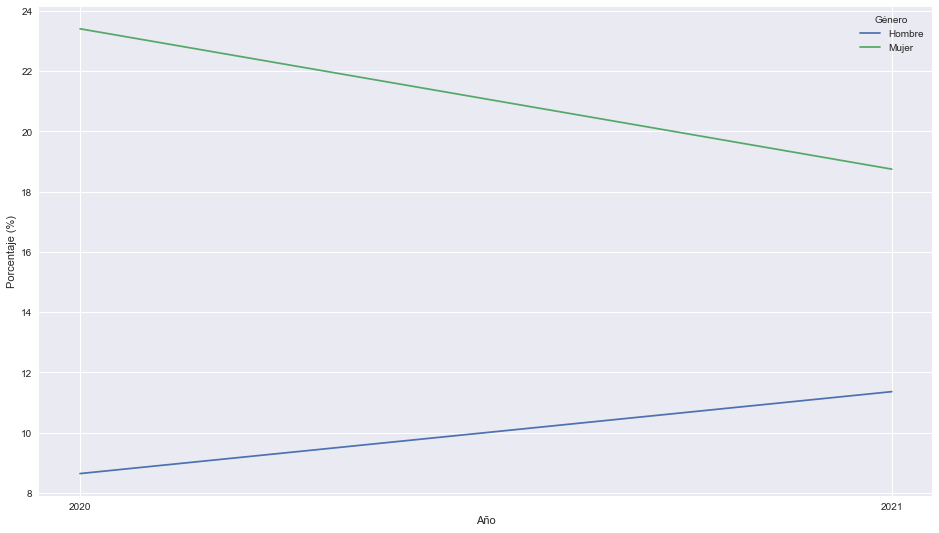

In [13]:
wfh_gender = pd.concat([wfh2020_gender, wfh2021_gender], ignore_index=True)
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x="Año", y="Porcentaje (%)", hue="Género", data=wfh_gender, ax=ax)
ax.set_xticks([2020, 2021])
plt.savefig(os.path.join(FIGURES_MAIN_TEXT_OUTPUT, "wfh_gender.png"))

# Share of employed population doing work from home given their income decil

In [14]:
decile_list = [10]
decile_list.extend([i for i in range(1, 10)])

In [15]:
wfh2020_decile = enaho2020.groupby(["D_IPCN", "CondAct", "C11"])["FACTOR"].sum().reset_index().query("CondAct == 'Ocupado'")
wfh2020_decile["FACTOR"] /= wfh2020_decile.groupby(["D_IPCN"])["FACTOR"].transform("sum") / 100
wfh2020_decile = wfh2020_decile.query("C11 == 'Dentro de su casa'").round(2)[["D_IPCN", "FACTOR"]].copy()
wfh2020_decile["Año"] = 2020
wfh2020_decile["D_IPCN"] = decile_list
wfh2020_decile.rename(columns={"D_IPCN": "Decil de ingreso per cápita", "FACTOR": "Porcentaje (%)"}, inplace=True)

In [16]:
wfh2021_decile = enaho2021.groupby(["D_IPCN", "CondAct", "M4"])["FACTOR"].sum().reset_index().query("CondAct == 'Ocupado'")
wfh2021_decile["FACTOR"] /= wfh2021_decile.groupby(["D_IPCN"])["FACTOR"].transform("sum") / 100
wfh2021_decile = wfh2021_decile.query("M4 == 'Sí'").round(2)[["D_IPCN", "FACTOR"]].copy()
wfh2021_decile["Año"] = 2021
wfh2021_decile["D_IPCN"] = decile_list
wfh2021_decile.rename(columns={"D_IPCN": "Decil de ingreso per cápita", "FACTOR": "Porcentaje (%)"}, inplace=True)

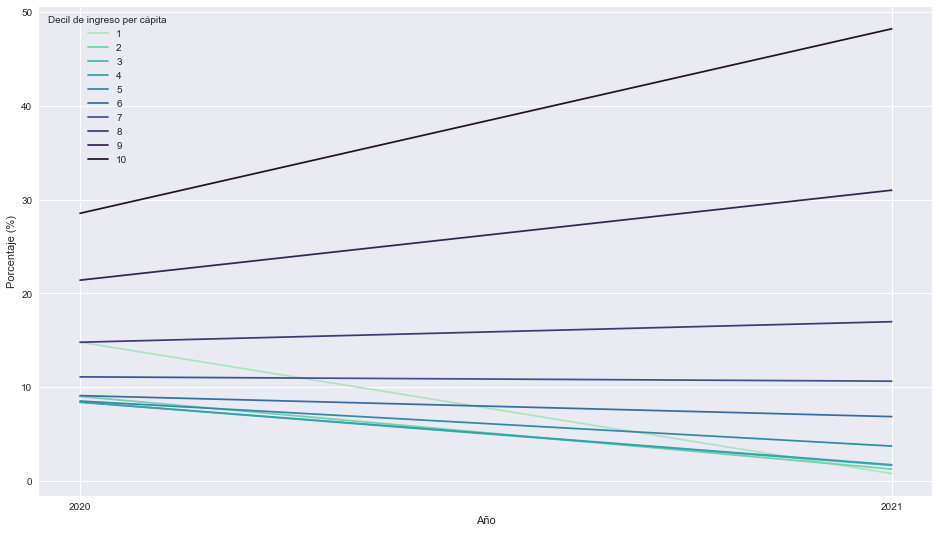

In [17]:
wfh_decile = pd.concat([wfh2020_decile, wfh2021_decile], ignore_index=True)
wfh_decile = wfh_decile.sort_values(["Año", "Decil de ingreso per cápita"])
wfh_decile["Decil de ingreso per cápita"] = wfh_decile["Decil de ingreso per cápita"].astype("str")
palette = sns.color_palette("mako_r", 10)
fig, ax = plt.subplots(figsize=(16, 9))
sns.lineplot(x="Año", y="Porcentaje (%)", hue="Decil de ingreso per cápita", palette=palette, data=wfh_decile, ax=ax)
ax.set_xticks([2020, 2021])
plt.savefig(os.path.join(FIGURES_APPENDIX_OUTPUT, "wfh_decile.png"))

# Proportion of Workers Who Commute within a Geographic Unit

In [18]:
employment2011 = employment2011.merge(distances, how="left", on=["municipality_origin", "municipality_destination"])

## Municipality

In [19]:
mun_within_commute = employment2011[['municipality_origin', 'municipality_destination']].value_counts().to_frame(name="Flujo de traslados").reset_index()
mun_within_commute["Flujo de traslados"] /= mun_within_commute.groupby("municipality_origin")["Flujo de traslados"].transform("sum") / 100
mun_within_commute = mun_within_commute.query("municipality_origin == municipality_destination")
mun_within_commute.drop(columns=["municipality_destination"], inplace=True)
mun_within_commute.rename(columns={"municipality_origin": "region"}, inplace=True)
mun_within_commute["Unidad geográfica"] = "Municipalidad"

## Commuting Zone

In [20]:
cz_within_commute = employment2011[['CZ_origin', 'CZ_destination']].value_counts().to_frame(name="Flujo de traslados").reset_index()
cz_within_commute["Flujo de traslados"] /= cz_within_commute.groupby("CZ_origin")["Flujo de traslados"].transform("sum") / 100
cz_within_commute = cz_within_commute.query("CZ_origin == CZ_destination")
cz_within_commute.drop(columns=["CZ_destination"], inplace=True)
cz_within_commute.rename(columns={"CZ_origin": "region"}, inplace=True)
cz_within_commute["Unidad geográfica"] = "Zona de Desplazamiento Laboral"

## Province

In [21]:
province_within_commute = employment2011[['province_origin', 'province_destination']].value_counts().to_frame(name="Flujo de traslados").reset_index()
province_within_commute["Flujo de traslados"] /= province_within_commute.groupby("province_origin")["Flujo de traslados"].transform("sum") / 100
province_within_commute = province_within_commute.query("province_origin == province_destination")
province_within_commute.drop(columns=["province_destination"], inplace=True)
province_within_commute.rename(columns={"province_origin": "region"}, inplace=True)
province_within_commute["Unidad geográfica"] = "Provincia"

## Administrative region

In [22]:
plan_region_within_commute = employment2011[['region_origin', 'region_destination']].value_counts().to_frame(name="Flujo de traslados").reset_index()
plan_region_within_commute["Flujo de traslados"] /= plan_region_within_commute.groupby("region_origin")["Flujo de traslados"].transform("sum") / 100
plan_region_within_commute = plan_region_within_commute.query("region_origin == region_destination")
plan_region_within_commute.drop(columns=["region_destination"], inplace=True)
plan_region_within_commute.rename(columns={"region_origin": "region"}, inplace=True)
plan_region_within_commute["Unidad geográfica"] = "Región de Planificación"

## Box plot

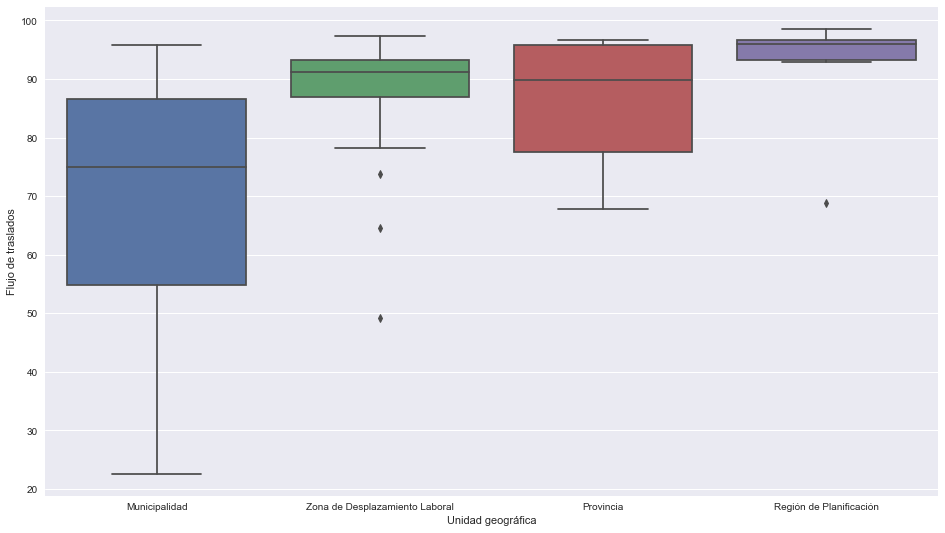

In [23]:
within_commute = pd.concat([mun_within_commute, cz_within_commute, province_within_commute, plan_region_within_commute], ignore_index=True)
fig, ax = plt.subplots(figsize=(16, 9))
sns.boxplot(x="Unidad geográfica", y="Flujo de traslados", data=within_commute, ax=ax)
plt.savefig(os.path.join(FIGURES_APPENDIX_OUTPUT, "within_commute.png"))

# Distribution of commuting matrix variables

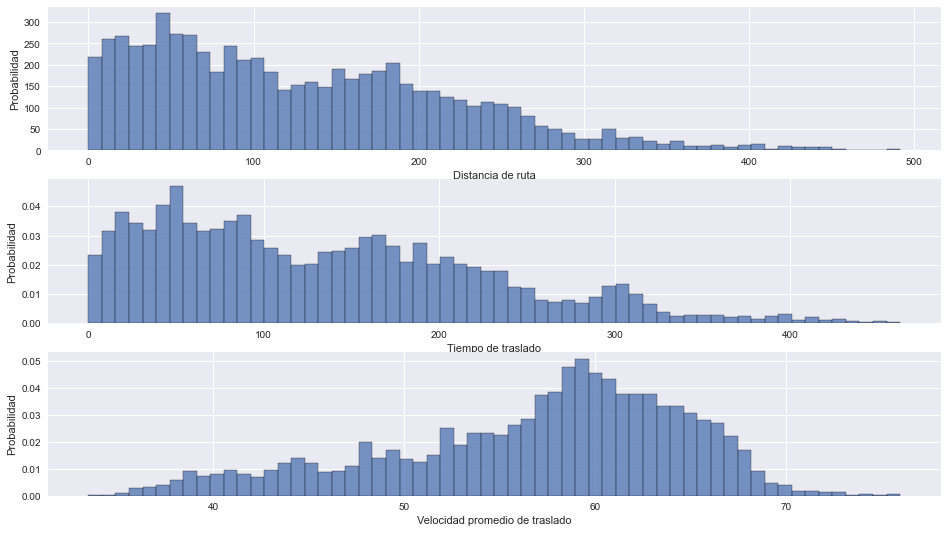

In [24]:
distances.rename(columns={"distance": "Distancia de ruta", "travel_time": "Tiempo de traslado", "avg_speed": "Velocidad promedio de traslado"}, inplace=True)
fig, ax = plt.subplots(3, 1, figsize=[16, 9])
sns.histplot(x="Distancia de ruta", data=distances, bins=60, ax=ax[0])
sns.histplot(x="Tiempo de traslado", data=distances, bins=60, stat="probability", ax=ax[1])
sns.histplot(x="Velocidad promedio de traslado", data=distances, bins=60, stat="probability", ax=ax[2])
ax[0].set_ylabel("Probabilidad")
ax[1].set_ylabel("Probabilidad")
ax[2].set_ylabel("Probabilidad")
plt.savefig(os.path.join(FIGURES_APPENDIX_OUTPUT, "commute_distribution.png"))

# Commuting variables: WFH vs going to HQ

In [25]:
enaho2020["REGION"] = enaho2020["REGION"].map(region_concordance_names)
enaho2021["REGION"] = enaho2021["REGION"].map(region_concordance_names)
enaho2020 = enaho2020.merge(agg_distances, on=["REGION", "C7C1"], how="left")
enaho2021 = enaho2021.merge(agg_distances, on=["REGION", "C7C1"], how="left")

In [26]:
commute2020 = enaho2020.loc[~enaho2020["C7C1"].isna(), ['FACTOR', 'REGION', "C7C1", "A4", "C11", "share_dist", "share_time"]].copy()
commute2020["Teletrabajo"] = "Sí"
commute2020.loc[commute2020["C11"] != 'Dentro de su casa', "Teletrabajo"] = "No"
commute2020.drop(columns="C11", inplace=True)
commute2020 = (commute2020.set_index(['FACTOR', 'REGION', "C7C1", "A4", "Teletrabajo"])
                          .stack()
                          .reset_index()
                          .rename(columns={"level_5": "Medida", 
                                           0: "Costo", 
                                           "C7C1": "Municipalidad de destino", 
                                           "A4": "Género", 
                                           "REGION": "Región de Planificación"}))
commute2020["Medida"] = commute2020["Medida"].map({"share_dist": "Distancia", 
                                                   "share_time": "Tiempo"})
commute2020["Región de Planificación"] = commute2020["Región de Planificación"].map(region_concordance.set_index("base").to_dict()["enaho_2020"])                                    

In [27]:
commute2021 = enaho2021.loc[~enaho2021["C7C1"].isna(), ['FACTOR', 'REGION', "C7C1", "A4", "M4", "M5", "M6", "share_dist", "share_time"]].copy()
commute2021 = commute2021.query("M6 not in (8.0, 'Ignorado')")
commute2021["M6"] = commute2021["M6"].cat.codes.round(0)
commute2021 = (commute2021.set_index(['FACTOR', 'REGION', "C7C1", "A4", "M4", "M5", "M6"])
                          .stack()
                          .reset_index()
                          .rename(columns={"level_7": "Medida", 
                                           0: "Costo", 
                                           "C7C1": "Municipalidad de destino", 
                                           "A4": "Género", 
                                           "REGION": "Región de Planificación", 
                                           "M4": "Teletrabajo", 
                                           "M5": "Teletrabajo por COVID-19", 
                                           "M6": "Días que realiza teletrabajo"}))
commute2021["Medida"] = commute2021["Medida"].map({"share_dist": "Distancia", 
                                                   "share_time": "Tiempo"})
commute2021["Región de Planificación"] = commute2021["Región de Planificación"].map(region_concordance.set_index("base").to_dict()["enaho_2020"])     

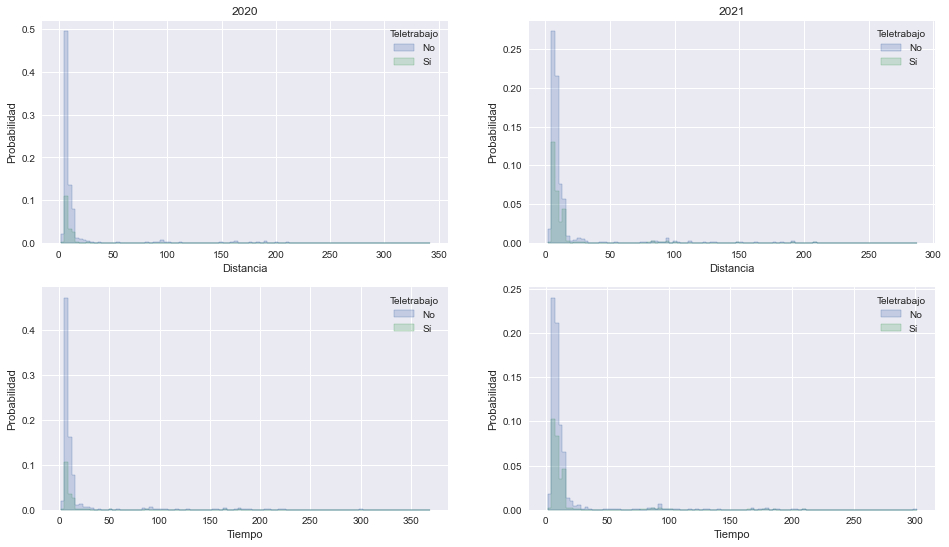

In [28]:
fig, ax = plt.subplots(2, 2, figsize=[16, 9])
sns.histplot(x="Costo", data=commute2020.query("Medida == 'Distancia'"), bins=100, hue="Teletrabajo", weights="FACTOR", element="step", ax=ax[0, 0], stat="probability")
sns.histplot(x="Costo", data=commute2020.query("Medida == 'Tiempo'"), bins=100, hue="Teletrabajo", weights="FACTOR", element="step", ax=ax[1, 0], stat="probability")
sns.histplot(x="Costo", data=commute2021.query("Medida == 'Distancia'"), bins=100, hue="Teletrabajo", weights="FACTOR", element="step", ax=ax[0, 1], stat="probability")
sns.histplot(x="Costo", data=commute2021.query("Medida == 'Tiempo'"), bins=100, hue="Teletrabajo", weights="FACTOR", element="step", ax=ax[1, 1], stat="probability")
ax[0, 0].set_xlabel("Distancia")
ax[1, 0].set_xlabel("Tiempo")
ax[0, 1].set_xlabel("Distancia")
ax[1, 1].set_xlabel("Tiempo")
ax[0, 0].set_ylabel("Probabilidad")
ax[1, 0].set_ylabel("Probabilidad")
ax[0, 1].set_ylabel("Probabilidad")
ax[1, 1].set_ylabel("Probabilidad")
ax[0, 0].set_title(2020)
ax[0, 1].set_title(2021)
plt.savefig(os.path.join(FIGURES_MAIN_TEXT_OUTPUT, "travel_time_dist_commute_vs_no_commute.png"))

# Back of the envelope time savings calculations for WFH because of COVID

In [29]:
bote_savings2021_wfh_covid = commute2021[commute2021["Teletrabajo por COVID-19"] == 'Sí'].copy()
bote_savings2021_wfh_covid["Ahorro"] = 4 * bote_savings2021_wfh_covid["Días que realiza teletrabajo"] * bote_savings2021_wfh_covid["Costo"]
bote_savings2021_wfh_covid["Ahorro promedio por Región de Planificación"] = bote_savings2021_wfh_covid["Ahorro"] * bote_savings2021_wfh_covid["FACTOR"] / bote_savings2021_wfh_covid.groupby(["Región de Planificación", "Medida"])["FACTOR"].transform("sum")

In [30]:
bote_savings2021_wfh_covid_region = bote_savings2021_wfh_covid.groupby(["Región de Planificación", "Medida"])["Ahorro promedio por Región de Planificación"].sum().reset_index()
bote_savings2021_wfh_covid_region.loc[bote_savings2021_wfh_covid_region["Medida"] == "Tiempo", "Ahorro promedio por Región de Planificación"] /= 60 
bote_savings2021_wfh_covid_region

,Región de Planificación,Medida,Ahorro promedio por Región de Planificación
0,Brunca,Distancia,2075.055143
1,Brunca,Tiempo,40.872094
2,Central,Distancia,169.846427
3,Central,Tiempo,3.118969
4,Chorotega,Distancia,1885.526124
5,Chorotega,Tiempo,29.574551
6,Huetar Caribe,Distancia,927.126547
7,Huetar Caribe,Tiempo,15.400947
8,Huetar Norte,Distancia,1399.944006
9,Huetar Norte,Tiempo,24.104486


In [31]:
bote_savings2021_wfh_covid_region.to_excel(os.path.join(TABLES_MAIN_TEXT_OUTPUT, "bote_savings2021_wfh_covid_region.xlsx"), index=False)